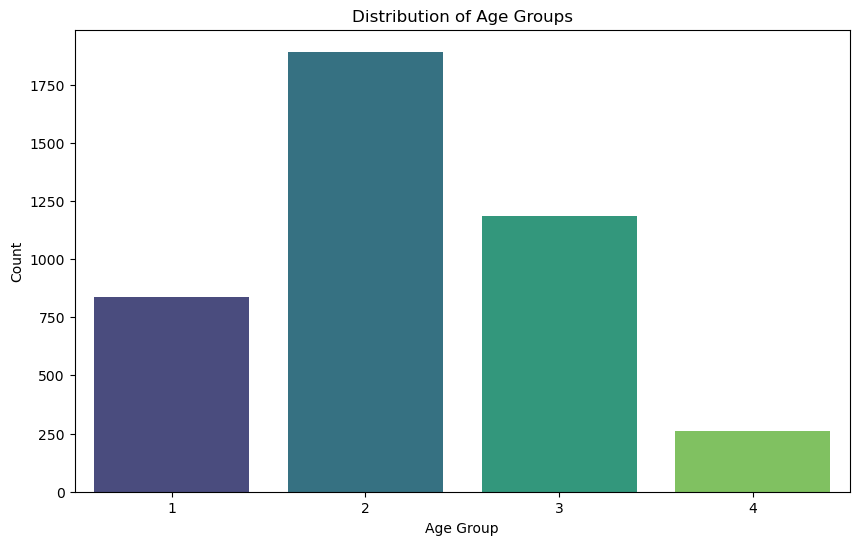

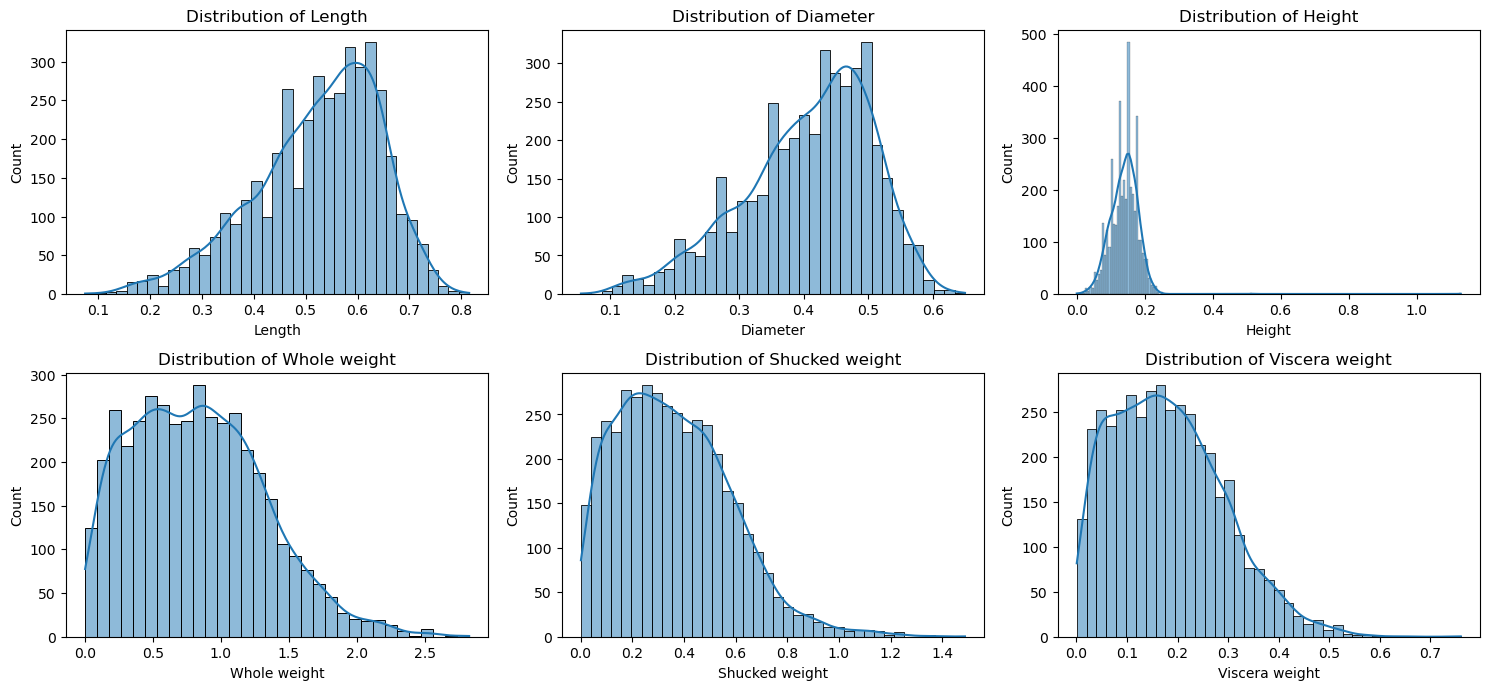

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Load the dataset
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
column_names = ["Sex", "Length", "Diameter", "Height", "Whole weight", "Shucked weight", "Viscera weight", "Shell weight", "Rings"]
abalone_data = pd.read_csv(url, names=column_names)

# Convert the 'Rings' feature to categorical class labels as per the given age groups
abalone_data['Age Group'] = pd.cut(abalone_data['Rings'], bins=[-1, 7, 10, 15, np.inf], labels=[1, 2, 3, 4])

# Visualize the distribution of the age groups (classes)
plt.figure(figsize=(10, 6))
age_group_distribution = abalone_data['Age Group'].value_counts().sort_index()
sns.barplot(x=age_group_distribution.index, y=age_group_distribution.values, palette="viridis")
plt.title('Distribution of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

# Visualize the distribution of features using histograms or boxplots
plt.figure(figsize=(15, 10))
for i, feature in enumerate(column_names[1:-2], 1):  # Skip 'Sex' and 'Rings' which are not continuous
    plt.subplot(3, 3, i)
    sns.histplot(abalone_data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


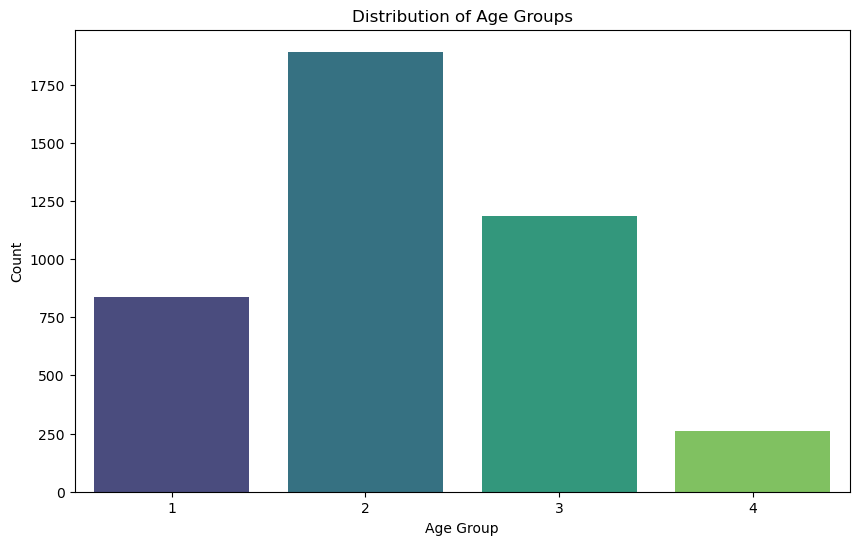

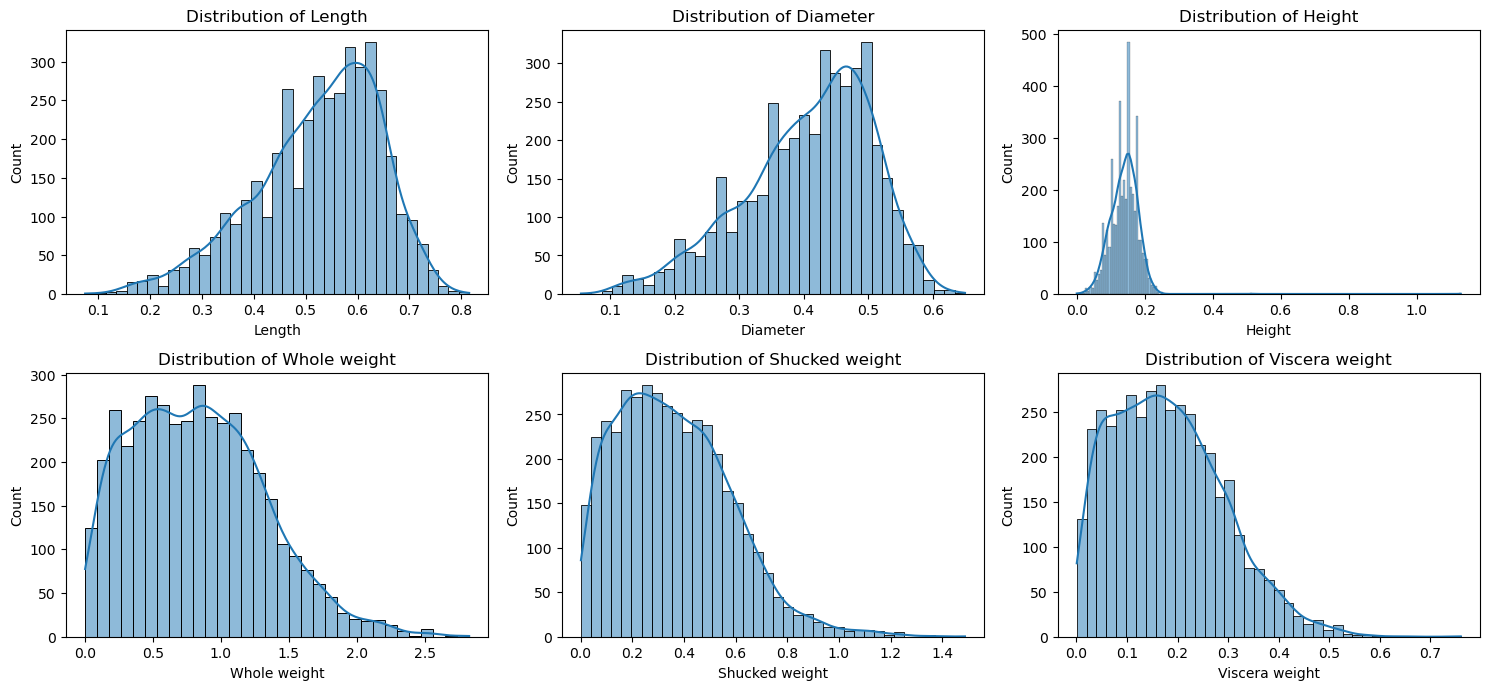

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age Group
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,3
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,1
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,2
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,2
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,1


In [11]:
import zipfile
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Define the path for the uploaded zip file and the extraction directory
zip_path = 'abalone.zip'
extract_dir = 'data'

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# List the contents of the extracted directory to see the files
extracted_files = os.listdir(extract_dir)
extracted_files



# Load the dataset from the extracted .data file
abalone_data_path = os.path.join(extract_dir, 'abalone.data')
column_names = ["Sex", "Length", "Diameter", "Height", "Whole weight", "Shucked weight", "Viscera weight", "Shell weight", "Rings"]
abalone_data = pd.read_csv(abalone_data_path, names=column_names)

# Convert the 'Rings' feature to categorical class labels as per the given age groups
abalone_data['Age Group'] = pd.cut(abalone_data['Rings'], bins=[-1, 7, 10, 15, np.inf], labels=[1, 2, 3, 4])

# Visualize the distribution of the age groups (classes)
plt.figure(figsize=(10, 6))
age_group_distribution = abalone_data['Age Group'].value_counts().sort_index()
sns.barplot(x=age_group_distribution.index, y=age_group_distribution.values, palette="viridis")
plt.title('Distribution of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

# Visualize the distribution of features using histograms or boxplots
plt.figure(figsize=(15, 10))
for i, feature in enumerate(column_names[1:-2], 1):  # Skip 'Sex' and 'Rings' which are not continuous
    plt.subplot(3, 3, i)
    sns.histplot(abalone_data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# Show the first few rows of the dataset for reference
abalone_data.head()


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Function to create the network with a given number of hidden neurons
def create_network(n_hidden_neurons, learning_rate=0.01):
    model = Sequential()
    model.add(Dense(n_hidden_neurons, input_shape=(X_train.shape[1],), activation='relu'))
    model.add(Dense(4, activation='softmax'))  # 4 output neurons for the 4 classes
    optimizer = SGD(learning_rate=learning_rate)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Preprocess the inputs and convert the labels to one-hot encoding
# ... (same as the preprocessing code provided earlier) ...

# Create models with different numbers of neurons
neuron_numbers = [5, 10, 15, 20]
for neurons in neuron_numbers:
    model = create_network(n_hidden_neurons=neurons)
    model.fit(X_train, y_train_categorical, epochs=100, batch_size=32, verbose=0)
    _, accuracy = model.evaluate(X_test, y_test_categorical, verbose=0)
    print(f'Accuracy for {neurons} neurons: {accuracy:.4f}')


NameError: name 'X_train' is not defined

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 数据预处理
# ...

# 创建网络的函数
def create_network(n_hidden_neurons, learning_rate=0.01):
    model = Sequential()
    model.add(Dense(n_hidden_neurons, input_shape=(X_train.shape[1],), activation='relu'))
    model.add(Dense(4, activation='softmax'))  # 4个输出神经元，对应4个类别
    optimizer = SGD(learning_rate=learning_rate)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# 将标签转换为独热编码
y_train_categorical = to_categorical(y_train.astype('int') - 1)
y_test_categorical = to_categorical(y_test.astype('int') - 1)

# 实验参数
neuron_numbers = [5, 10, 15, 20]
num_experiments = 10  # 每个配置运行实验的次数

# 实验结果的存储
results = {}

# 对不同数量的隐藏神经元进行实验
for neurons in neuron_numbers:
    experiment_accuracies = []
    for _ in range(num_experiments):
        # 创建网络
        model = create_network(n_hidden_neurons=neurons)
        # 训练网络
        model.fit(X_train, y_train_categorical, epochs=100, batch_size=32, verbose=0)
        # 评估网络
        _, accuracy = model.evaluate(X_test, y_test_categorical, verbose=0)
        experiment_accuracies.append(accuracy)
    
    # 计算平均准确率和95%置信区间
    mean_accuracy = np.mean(experiment_accuracies)
    confidence_interval = 1.96 * np.std(experiment_accuracies) / np.sqrt(num_experiments)
    results[neurons] = (mean_accuracy, confidence_interval)
    print(f'Neurons: {neurons}, Accuracy: {mean_accuracy:.4f}, 95% CI: {confidence_interval:.4f}')


In [ ]:
learning_rates = [0.001, 0.01, 0.05, 0.1, 0.2]  # 一个学习率的示例列表
num_experiments = 10  # 每种设置要重复的实验次数
best_n_neurons = 20  # 从之前的实验中确定的最佳隐藏神经元数量

# 存储实验结果
learning_rate_results = {}

for lr in learning_rates:
    experiment_accuracies = []
    for _ in range(num_experiments):
        # 创建神经网络模型
        model = create_network(n_hidden_neurons=best_n_neurons, learning_rate=lr)
        # 训练模型
        model.fit(X_train, y_train_categorical, epochs=100, batch_size=32, verbose=0)
        # 评估模型
        _, accuracy = model.evaluate(X_test, y_test_categorical, verbose=0)
        experiment_accuracies.append(accuracy)
    
    # 计算并存储平均准确率和95%置信区间
    mean_accuracy = np.mean(experiment_accuracies)
    confidence_interval = 1.96 * np.std(experiment_accuracies) / np.sqrt(num_experiments)
    learning_rate_results[lr] = (mean_accuracy, confidence_interval)
    print(f'Learning rate: {lr}, Accuracy: {mean_accuracy:.4f}, 95% CI: {confidence_interval:.4f}')


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 加载数据集
column_names = ["Sex", "Length", "Diameter", "Height", "Whole weight", "Shucked weight", "Viscera weight", "Shell weight", "Rings"]
abalone_data = pd.read_csv('abalone.data', names=column_names)

# 将'环数'特征转换为分类标签
abalone_data['Age Group'] = pd.cut(abalone_data['Rings'], bins=[-1, 7, 10, 15, np.inf], labels=[1, 2, 3, 4])

# 选择分类特征和连续特征
categorical_features = ['Sex']
continuous_features = ["Length", "Diameter", "Height", "Whole weight", "Shucked weight", "Viscera weight", "Shell weight"]

# 创建预处理管道
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, continuous_features),
        ('cat', categorical_transformer, categorical_features)])

# 应用预处理
X = abalone_data.drop(['Rings', 'Age Group'], axis=1)
y = abalone_data['Age Group']
X_preprocessed = preprocessor.fit_transform(X)

# 数据划分
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.4, random_state=42)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

# 创建神经网络的函数
def create_network(n_hidden_neurons, learning_rate=0.01):
    model = Sequential()
    model.add(Dense(n_hidden_neurons, input_shape=(X_train.shape[1],), activation='relu'))
    model.add(Dense(4, activation='softmax')) # 4个输出神经元，对应4个类别
    optimizer = SGD(learning_rate=learning_rate)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# 将标签转换为独热编码
y_train_categorical = to_categorical(y_train.astype('int') - 1)
y_test_categorical = to_categorical(y_test.astype('int') - 1)

# 示例：使用5个隐藏神经元创建网络
model_example = create_network(n_hidden_neurons=5)


In [ ]:
# 对不同数量的隐藏神经元进行实验
neuron_numbers = [5, 10, 15, 20]
for neurons in neuron_numbers:
    model = create_network(n_hidden_neurons=neurons)
    model.fit(X_train, y_train_categorical, epochs=100, batch_size=32, verbose=0)
    _, accuracy = model.evaluate(X_test, y_test_categorical, verbose=0)
    print(f'Accuracy for {neurons} neurons: {accuracy:.4f}')


In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 数据预处理
# ...

# 创建网络的函数
def create_network(n_hidden_neurons, learning_rate=0.01):
    model = Sequential()
    model.add(Dense(n_hidden_neurons, input_shape=(X_train.shape[1],), activation='relu'))
    model.add(Dense(4, activation='softmax'))  # 4个输出神经元，对应4个类别
    optimizer = SGD(learning_rate=learning_rate)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# 将标签转换为独热编码
y_train_categorical = to_categorical(y_train.astype('int') - 1)
y_test_categorical = to_categorical(y_test.astype('int') - 1)

# 实验参数
neuron_numbers = [5, 10, 15, 20]
num_experiments = 10  # 每个配置运行实验的次数

# 实验结果的存储
results = {}

# 对不同数量的隐藏神经元进行实验
for neurons in neuron_numbers:
    experiment_accuracies = []
    for _ in range(num_experiments):
        # 创建网络
        model = create_network(n_hidden_neurons=neurons)
        # 训练网络
        model.fit(X_train, y_train_categorical, epochs=100, batch_size=32, verbose=0)
        # 评估网络
        _, accuracy = model.evaluate(X_test, y_test_categorical, verbose=0)
        experiment_accuracies.append(accuracy)
    
    # 计算平均准确率和95%置信区间
    mean_accuracy = np.mean(experiment_accuracies)
    confidence_interval = 1.96 * np.std(experiment_accuracies) / np.sqrt(num_experiments)
    results[neurons] = (mean_accuracy, confidence_interval)
    print(f'Neurons: {neurons}, Accuracy: {mean_accuracy:.4f}, 95% CI: {confidence_interval:.4f}')


In [ ]:
learning_rates = [0.001, 0.01, 0.05, 0.1, 0.2]  # 一个学习率的示例列表
num_experiments = 10  # 每种设置要重复的实验次数
best_n_neurons = 20  # 从之前的实验中确定的最佳隐藏神经元数量

# 存储实验结果
learning_rate_results = {}

for lr in learning_rates:
    experiment_accuracies = []
    for _ in range(num_experiments):
        # 创建神经网络模型
        model = create_network(n_hidden_neurons=best_n_neurons, learning_rate=lr)
        # 训练模型
        model.fit(X_train, y_train_categorical, epochs=100, batch_size=32, verbose=0)
        # 评估模型
        _, accuracy = model.evaluate(X_test, y_test_categorical, verbose=0)
        experiment_accuracies.append(accuracy)
    
    # 计算并存储平均准确率和95%置信区间
    mean_accuracy = np.mean(experiment_accuracies)
    confidence_interval = 1.96 * np.std(experiment_accuracies) / np.sqrt(num_experiments)
    learning_rate_results[lr] = (mean_accuracy, confidence_interval)
    print(f'Learning rate: {lr}, Accuracy: {mean_accuracy:.4f}, 95% CI: {confidence_interval:.4f}')


In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

def create_network(n_hidden_neurons, optimizer_choice='SGD', learning_rate=0.01, l2_lambda=0.01):
    model = Sequential()
    model.add(Dense(n_hidden_neurons, input_shape=(X_train.shape[1],), activation='relu',
                    kernel_regularizer=l2(l2_lambda)))
    # L2正则化
    model.add(Dense(4, activation='softmax'))
    # 选择优化器
    if optimizer_choice == 'SGD':
        optimizer = SGD(learning_rate=learning_rate)
    elif optimizer_choice == 'Adam':
        optimizer = Adam(learning_rate=learning_rate)
    else:
        raise ValueError("Optimizer choice must be 'SGD' or 'Adam'")
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# 比较优化器
optimizers = ['SGD', 'Adam']
num_experiments = 10
best_n_neurons = 20
best_learning_rate = 0.01  # 假设这是之前实验确定的最佳学习率
best_l2_lambda = 0.01      # 假设这是之前实验确定的最佳L2正则化强度

# 存储实验结果
optimizer_results = {}

for opt in optimizers:
    experiment_accuracies = []
    for _ in range(num_experiments):
        # 创建神经网络模型
        model = create_network(n_hidden_neurons=best_n_neurons, optimizer_choice=opt, learning_rate=best_learning_rate, l2_lambda=best_l2_lambda)
        # 训练模型
        model.fit(X_train, y_train_categorical, epochs=100, batch_size=32, verbose=0)
        # 评估模型
        _, accuracy = model.evaluate(X_test, y_test_categorical, verbose=0)
        experiment_accuracies.append(accuracy)
    
    # 计算并存储平均准确率和95%置信区间
    mean_accuracy = np.mean(experiment_accuracies)
    confidence_interval = 1.96 * np.std(experiment_accuracies) / np.sqrt(num_experiments)
    optimizer_results[opt] = (mean_accuracy, confidence_interval)
    print(f'Optimizer: {opt}, Accuracy: {mean_accuracy:.4f}, 95% CI: {confidence_interval:.4f}')


In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, RocCurveDisplay
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.regularizers import l2

# 假设你已经确定了最佳模型的参数
best_params = {
    'n_hidden_neurons': 20,
    'learning_rate': 0.01,
    'l2_lambda': 0.01,
    'optimizer_choice': 'Adam'
}

# 创建并训练最佳模型
best_model = create_network(**best_params)
best_model.fit(X_train, y_train_categorical, epochs=100, batch_size=32, verbose=0)

# 评估准确率
_, accuracy = best_model.evaluate(X_test, y_test_categorical, verbose=0)
print(f'Accuracy: {accuracy:.4f}')

# 预测测试集
y_pred = best_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test_categorical, axis=1)

# 绘制混淆矩阵
conf_mat = confusion_matrix(y_true_classes, y_pred_classes)
print(conf_mat)

# ROC曲线和AUC
# 计算每个类别的ROC曲线和AUC
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_categorical.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_categorical[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# 绘制所有类别的ROC曲线
for i in range(n_classes):
    plt.figure()
    RocCurveDisplay(fpr=fpr[i], tpr=tpr[i], roc_auc=roc_auc[i]).plot()
    plt.title(f'ROC for class {i+1}')
    plt.show()
